# Data Transformations,
# Distance Measures
# A Regression Model from Statistics

## Skewness
### $\large \text{skew} = \dfrac{3 (\text{Mean - Median})}{\text{Standard Deviation}}$
### Skewness = 0: The distribution is perfectly symmetrical.
### Skewness > 0: The distribution is skewed to the right (positively skewed), meaning that the right tail is longer or fatter than the left tail.
### Skewness < 0: The distribution is skewed to the left (negatively skewed), meaning that the left tail is longer or fatter than the right tail.

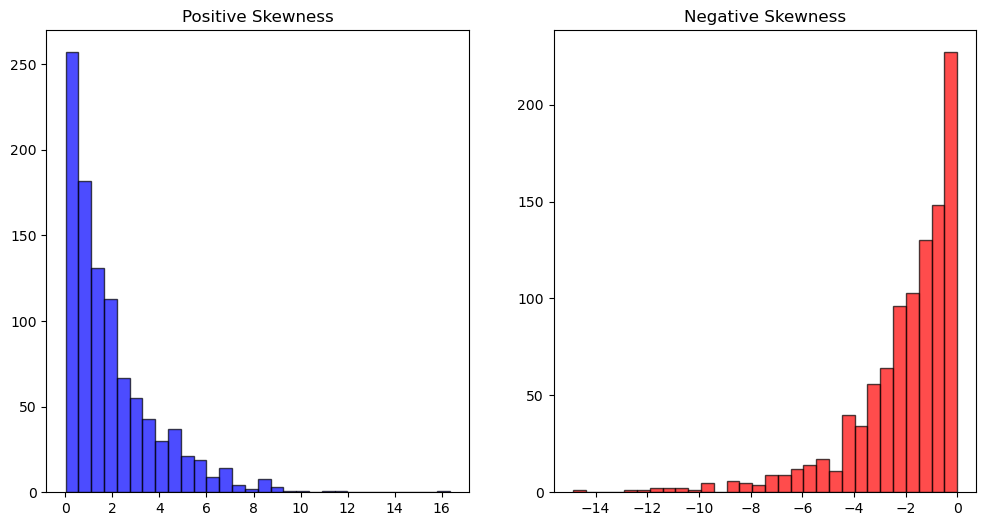

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Generate data with positive skewness
positive_skew_data = np.random.exponential(scale=2, size=1000)

# Generate data with negative skewness
negative_skew_data = -np.random.exponential(scale=2, size=1000)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(positive_skew_data, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Positive Skewness')

plt.subplot(1, 2, 2)
plt.hist(negative_skew_data, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Negative Skewness')

plt.show()


## Data Variables Transformations
### Changes  variable values to satisfy some required conditions such as being Normal Distribution
### May help find the relationship between variables better
### Should not be applied routinely as it may also distort the relationship between variables

## Common Transformations
###  For a Positively Skewed data:

### $\Large new x = \sqrt{x+c}$ 

### $\Large new x = \log_{10}(x+c),\,\,\text{where } x_{min}+c \geq 1 $ 

###  For a Negatively Positively Skewed data:

### $\Large new x = \sqrt{k - x}$ 

### $\Large new x = \log_{10}(k- x) ,\text{where } k-x_{max} \geq 1 $ 


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cars = pd.read_csv('uscars.csv') 
# https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
cars = cars.dropna()
cars.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [4]:
cars.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

## $$\large skew = \dfrac{3 ( Mean - Median)}{Standard Deviation}$$

In [5]:
# Find Skews
from scipy.stats import skew
print(skew(cars.year))

-3.5572608903098555


In [6]:
# Find the minimal year
min(cars.year)

1973

<Axes: xlabel='year', ylabel='Count'>

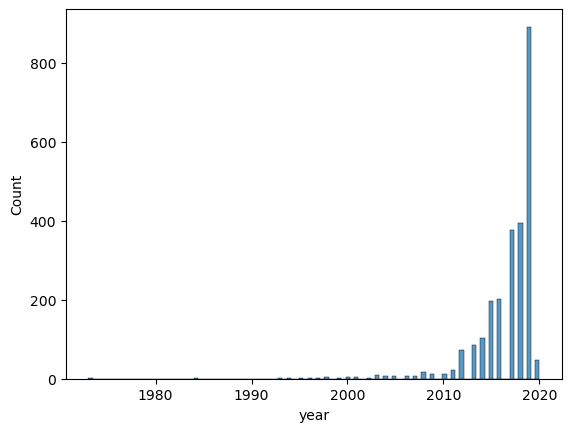

In [7]:
sns.histplot(data=cars, x="year")

In [8]:
max(cars.year)

2020

<Axes: xlabel='transformed_year', ylabel='Count'>

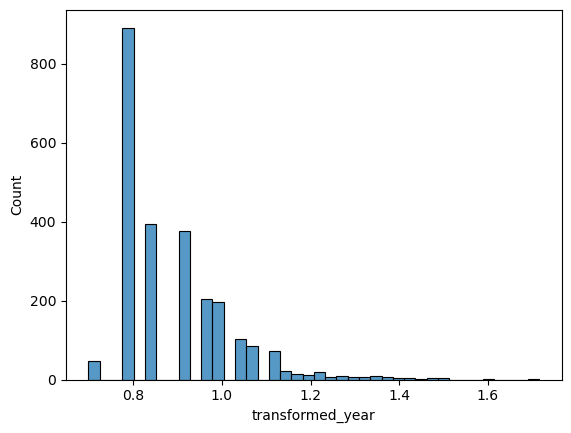

In [9]:
import numpy as np
cars['transformed_year'] = np.log10(2025 - cars.year)
sns.histplot(data=cars, x="transformed_year")

## Variable Transformation Continued
### The following are used when some of the variables are too small or too large or on a different scale
### Normalized (min/max normalized):  $\large new x = \dfrac{x-x_{min}}{x_{max}-x_{min}}$
### Standardized ( mean normalized):  $\large new x = \dfrac{x-mean(x)}{\sigma}$

#  Distance Metrics 

## Distances
###  $\large x = (x_1, x_2, x_3,\cdots, x_n)^T$ and $\large y = (y_1, y_2, y_3,\cdots, y_n)^T$
### Euclidean DIstance:
$$\large || x-y||_2 = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2+ \cdots +(x_n-y_n)^2} = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$
### Manhattan Distance
$$\large || x-y||_1 = |x_1-x_2| + |x_2-y_2|+ \cdots +|x_n-y_n| = \sum_{i=1}^n|x_i-y_i|$$
###  Cosine Similarity:
$$\displaystyle{\large \cos\theta =\dfrac{ x\cdot y}{||x||_2 ||y||_2} = \dfrac{\sum_{i=1}^nx_i\cdot y_i}{\sqrt{\sum_{i=1}^nx_i^2\cdot \sum_{i=1}^n y_i^2}}}$$

## R- squared metric
$$\bf \Large \text{r_squared} = 1 - \dfrac{\sum(y-\hat{y})^2}{\sum(y-\bar{y})^2}$$
## MSE and RMSE
$$\bf \Large \text{MSE} = \dfrac{\sum(y-\hat{y})^2}{n}$$

$$\bf \Large \text{RMSE} = \sqrt{\dfrac{\sum(y-\hat{y})^2}{n}}$$
## MAE
$$ \bf \Large MAE = \dfrac{\sum_{i=1}^{n} |y_i - x_i|} {n}$$


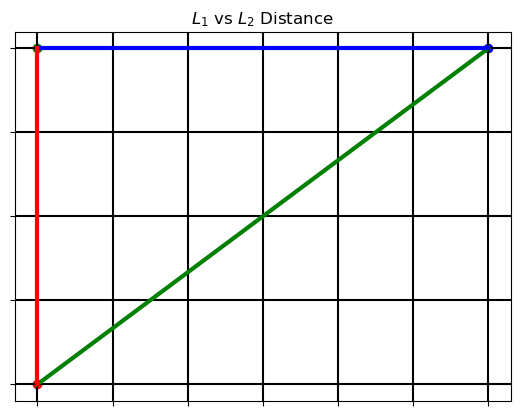

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Set the thickness of grid lines
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_xticks(range(11))
ax.set_yticks(range(11))

# Plot points A, B, and C
point_A = (2, 3)
point_B = (8, 7)
point_C = (2, 7)

plt.scatter(*point_A, color='red', label='Point A')
plt.scatter(*point_B, color='blue', label='Point B')
plt.scatter(*point_C, color='green', label='Point C')

# Connect A, B, and C to form a right-angled triangle
plt.plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], linestyle='-', linewidth=3, color='green', label='Line AB')
plt.plot([point_B[0], point_C[0]], [point_B[1], point_C[1]], linestyle='-', linewidth=3, color='blue', label='Line BC')
plt.plot([point_C[0], point_A[0]], [point_C[1], point_A[1]], linestyle='-', linewidth=3, color='red', label='Line CA')
plt.title(r'$L_1$ vs $L_2$ Distance')
# Adjust grid thickness
plt.grid(True, linewidth=1.5, linestyle='-', color='black')
plt.show()

In [11]:
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,transformed_year
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,1.230449
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,1.146128
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,0.845098
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,1.041393
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,0.845098


In [12]:
# Testing Accuracies Continous Variable
y = cars.price
ybar = cars.price + np.random.normal(0,1) * 5
res = "\n".join("{} {}".format(x, y) for x, y in zip(y[:10], round(ybar[:10],3)))
print(res)

6300 6295.61
2899 2894.61
5350 5345.61
25000 24995.61
27700 27695.61
5700 5695.61
7300 7295.61
13350 13345.61
14600 14595.61
5250 5245.61


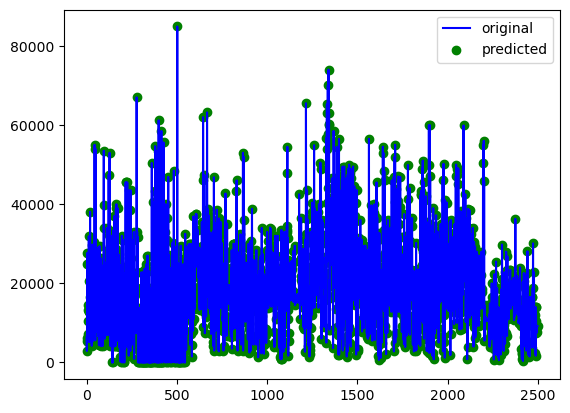

In [13]:
# Quick plot
x = list(range(len(y)))
plt.plot(x, y, color="blue", label="original")
plt.scatter(x, ybar, color="green", label="predicted")
plt.legend()
plt.show() 

In [14]:
# Mean Absolute Error
MAE = sum(abs(y-ybar))/len(y)
MAE

4.389912933782969

In [15]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y, ybar)
mae

4.389912933782984

In [16]:
# MSE and RMSE
mse = metrics.mean_squared_error(y, ybar)
mse

19.271335566195123

In [17]:
MSE = sum((y-ybar)**2)/len(y)
MSE

19.271335566195127

In [18]:
cars.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition',
       'transformed_year'],
      dtype='object')

In [19]:
# Dummycoding ( Changing  Categorical variables to numbers)
df = cars[['price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'state', 'country', 'condition']]

In [20]:
df = pd.get_dummies(df)
df.head()

,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,274117.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5350,2018,39590.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Data, Models and Learning
https://mml-book.github.io/

## Data
###  We assume that data is either in a tabular format or  can be transformed to a tabular format with columns representing variables (x) or features or  attributes, or covariates. 
### For the regression or classification problem, the data also has a variable y represented by a column and often known as target or response variable
###  So a data set  is:  $\large{\{(x_1, y_1), (x_2, y_2), \cdots,\cdots, (x_n, y_n)}\}$

$\Large y = 3x+1$

$\Large(0, 1), (1, 4)$

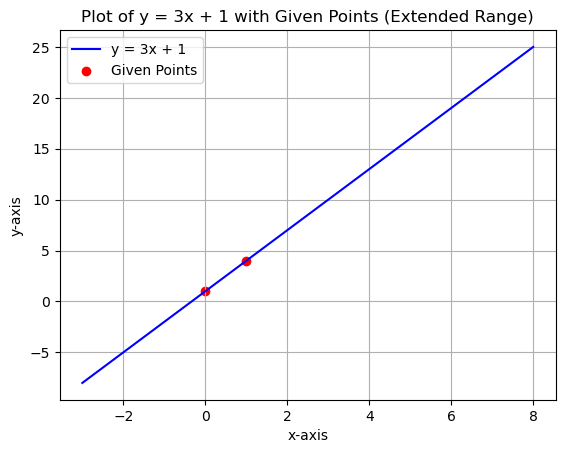

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Given points
points_x = [0, 1]
points_y = [1, 4]

# Generate x values for the plot with an extended range
x_values = np.linspace(-3, 8, 100)

# Plot the linear equation
plt.plot(x_values, 3 * x_values + 1, label='y = 3x + 1', color='blue')

# Plot the given points
plt.scatter(points_x, points_y, color='red', label='Given Points')

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of y = 3x + 1 with Given Points (Extended Range)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Model
### In a supervised Machine learning model, we come up with a function of the form by by finding all the $\Large \theta$s by various methods
$\Large y \approx \theta_0+ \theta_1 x_1 + \theta_2 x_2 + \cdots +\theta_n x_n = \theta_0 + \theta^Tx$ 
###  Data is often noisy: Measurement noise, Worng or missing input and replaced values, Sampling noise etc
### Because of the noise, predictions are uncertain and hence model can be thought of as a probaility distribution

In [22]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame

# Define dependent variable (y) and independent variables (x)
y = df['price']
X = df.drop('price', axis=1)  # Assuming 'price' is the dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     24.32
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:49:26   Log-Likelihood:                -25262.
No. Observations:                2499   AIC:                         5.110e+04
Df Residuals:                    2211   BIC:                         5.278e+04
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -3.838e+05   6.23e+04     -6.158      0.000   -5.06e+05   -2.62e+05
year                                            442.0215     70.038      6.311      0.000     304.675     579.368
mileage                                          -0.0381      0.004    -10.634      0.000      -0.045      -0.031
brand_acura                                   -1.517e+04   4935.845     -3.074      0.002   -2.48e+04   -5491.019
brand_audi                                     -1.03e+04   4976.877     -2.070      0.039   -2.01e+04    -540.251
brand_bmw                                     -1.259e+04   3511.254     -3.586      0.000   -1.95e+04   -5706.184
brand_buick                                   -1.164e+04   3381.845     -3.443      0.001   -1.83e+04   -5010.891
brand_cadillac                                -7493.9546   3433.341     -2.183      0.029   -1.42e+04    -761.044
brand_chevrolet                               -1.266e+04   2573.023     -4.919      0.000   -1.77e+04   -7611.953
brand_chrysler                                -1.721e+04   3150.836     -5.461      0.000   -2.34e+04    -1.1e+04
brand_dodge                                   -1.599e+04   2560.565     -6.246      0.000    -2.1e+04    -1.1e+04
brand_ford                                    -1.134e+04   2540.463     -4.463      0.000   -1.63e+04   -6357.379
brand_gmc                                     -1.525e+04   2775.169     -5.494      0.000   -2.07e+04   -9805.620
brand_harley-davidson                          8633.9873   3457.821      2.497      0.013    1853.071    1.54e+04
brand_heartland                                 -2.6e+04   3344.180     -7.775      0.000   -3.26e+04   -1.94e+04
brand_honda                                   -1.769e+04   3083.573     -5.738      0.000   -2.37e+04   -1.16e+04
brand_hyundai                                 -2.182e+04   3197.747     -6.822      0.000   -2.81e+04   -1.55e+04
brand_infiniti                                -9411.7158   3403.171     -2.766      0.006   -1.61e+04   -2737.970
brand_jaguar                                  -2.483e+04   6801.149     -3.651      0.000   -3.82e+04   -1.15e+04
brand_jeep                                    -1.737e+04   2945.555     -5.898      0.000   -2.31e+04   -1.16e+04
brand_kia                                     -2.271e+04   3992.193     -5.688      0.000   -3.05e+04   -1.49e+04
brand_land                                    -1.093e+04   4659.780     -2.346      0.019   -2.01e+04   -1794.119
brand_lexus                                   -1.186e+04   6663.949     -1.780      0.075   -2.49e+04    1206.092
brand_lincoln                                 -1.536e+04   6846.051     -2.243      0.025   -2.88e+04   -1930.469
brand

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

ypred = model.predict(X)

# Calculate RMSE and MAE
rmse = sqrt(mean_squared_error(y, ypred))
mae = mean_absolute_error(y, ypred)
r_squared = r2_score(y, ypred)
# Print RMSE and MAE
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'r-squared: {r_squared:.2f}')

Root Mean Squared Error (RMSE): 5941.57
Mean Absolute Error (MAE): 3939.79
r-squared: 0.76
